# Campione casuale di imprese

In [58]:
import pandas as pd

df = pd.read_csv('test_dataset.csv')
print(f"The dataset contains {len(df)} companies.")
print("Here is a sample:")

print(df.head(10))

The dataset contains 100000 companies.
Here is a sample:
   company_name   sector   size location
0  Company 1066  Finance  Large       GO
1  Company 2367  Finance  Large       GO
2  Company 4044  Finance  Large       GO
3  Company 4206  Finance  Large       GO
4  Company 4477  Finance  Large       GO
5  Company 4865  Finance  Large       GO
6  Company 4965  Finance  Large       GO
7  Company 5206  Finance  Large       GO
8  Company 6145  Finance  Large       GO
9  Company 6864  Finance  Large       GO


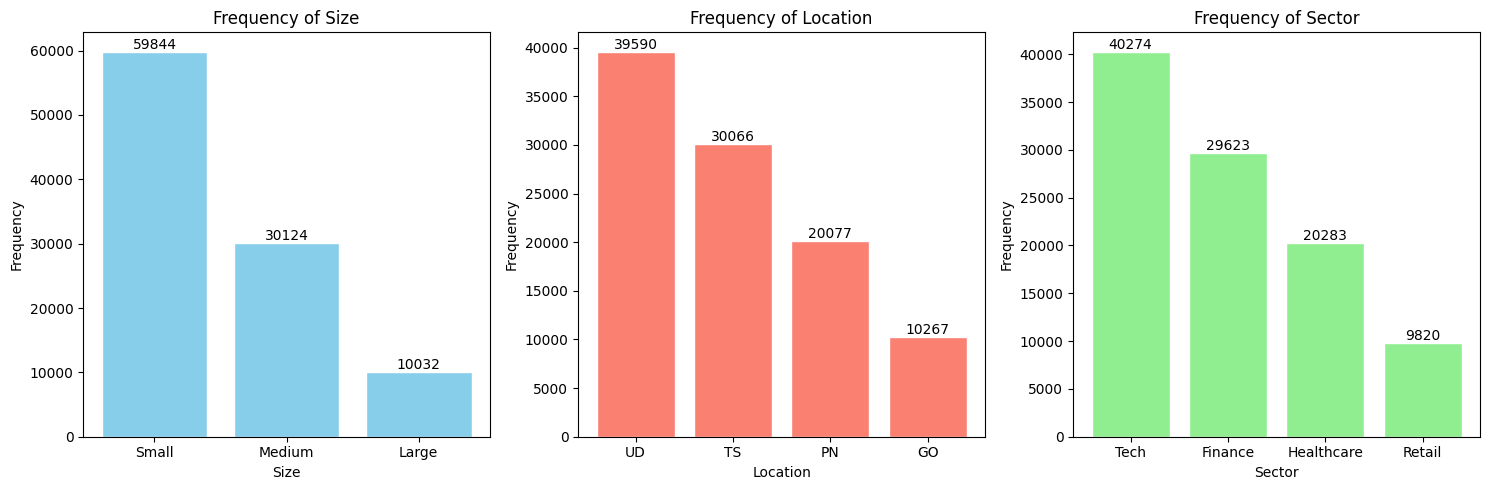

In [60]:
import matplotlib.pyplot as plt

def plot_column_charts(df):
    # Calculate frequency of each category
    size_counts = df['size'].value_counts()
    location_counts = df['location'].value_counts()
    sector_counts = df['sector'].value_counts()

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot column chart for size
    axes[0].bar(size_counts.index, size_counts.values, color='skyblue', edgecolor='white')
    axes[0].set_title('Frequency of Size')
    axes[0].set_xlabel('Size')
    axes[0].set_ylabel('Frequency')
    for i, count in enumerate(size_counts.values):
        axes[0].text(i, count, str(count), ha='center', va='bottom')

    # Plot column chart for location
    axes[1].bar(location_counts.index, location_counts.values, color='salmon', edgecolor='white')
    axes[1].set_title('Frequency of Location')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Frequency')
    for i, count in enumerate(location_counts.values):
        axes[1].text(i, count, str(count), ha='center', va='bottom')

    # Plot column chart for sector
    axes[2].bar(sector_counts.index, sector_counts.values, color='lightgreen', edgecolor='white')
    axes[2].set_title('Frequency of Sector')
    axes[2].set_xlabel('Sector')
    axes[2].set_ylabel('Frequency')
    for i, count in enumerate(sector_counts.values):
        axes[2].text(i, count, str(count), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function with your DataFrame
plot_column_charts(df)




Esempio di campionamento che dipende dall'ordine delle imprese in df

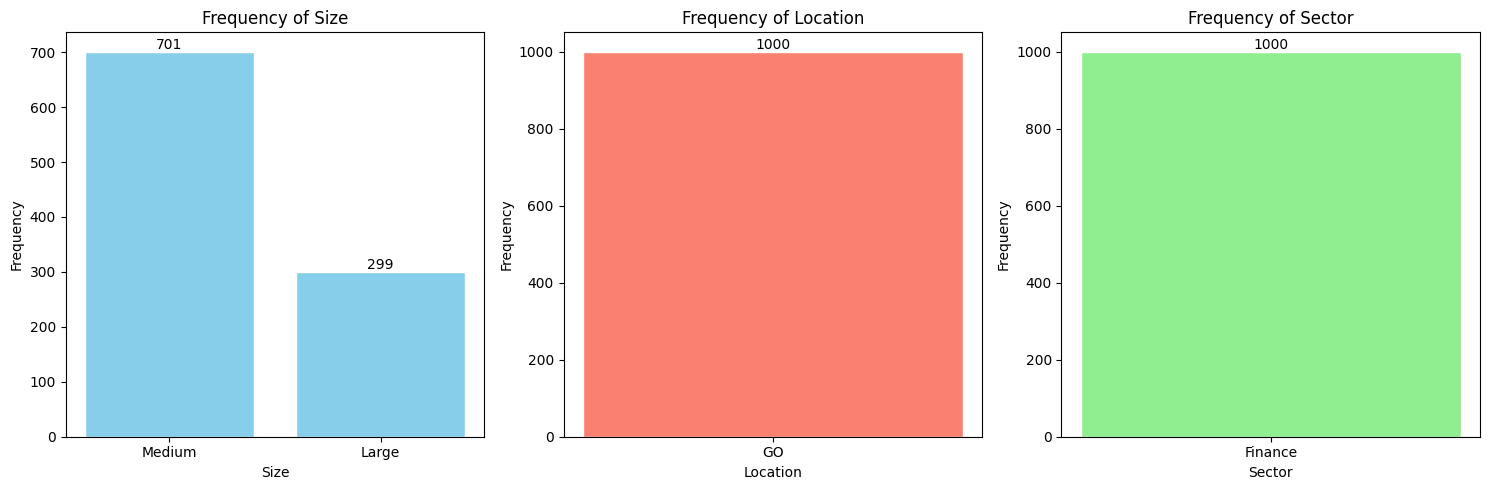

In [61]:
sample_size = 1000
sample1 = df.head(sample_size)
plot_column_charts(sample1)

# esempio di campionamento casuale (senza considerare i settori)

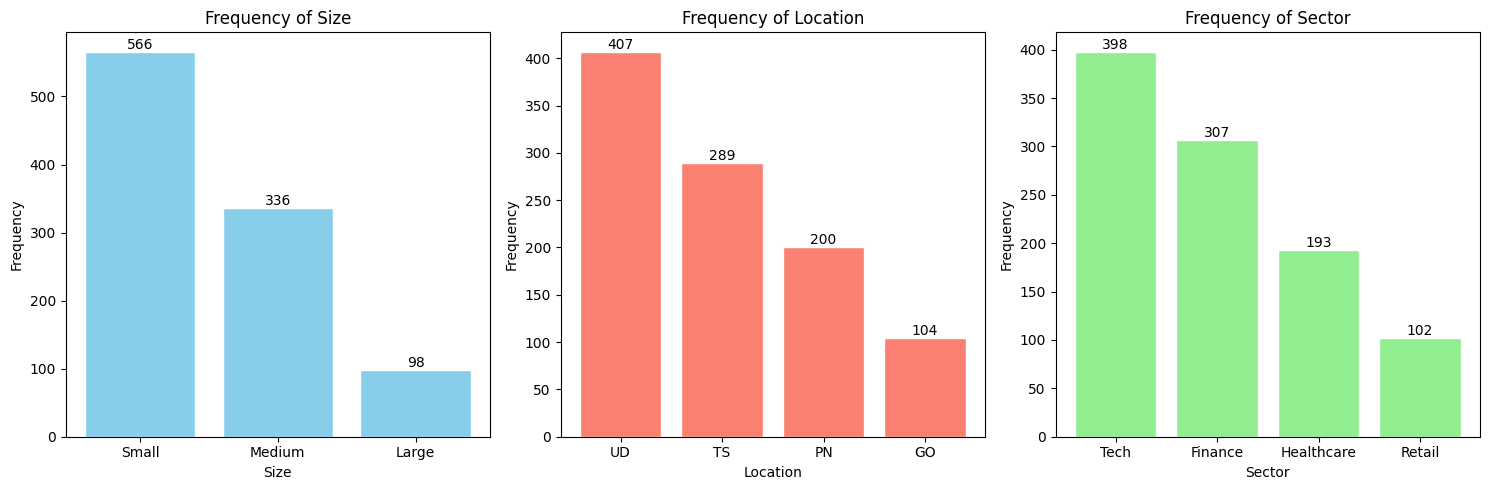

In [69]:
sample_size = 1000
sample1 = df.sample(sample_size)
plot_column_charts(sample1)

# esempio di campionamento considerando esplicitamente i settori

In [70]:
sample_size = 1000
dataset_size = len(df)
sample_percentage = sample_size / dataset_size
sample_percentage

0.01

In [82]:

# Define the function to sample unequal percentages of companies within each group
def sample_percent(group, p):
    return group.sample(frac=p)


Il campione estratto ha 1000 imprese


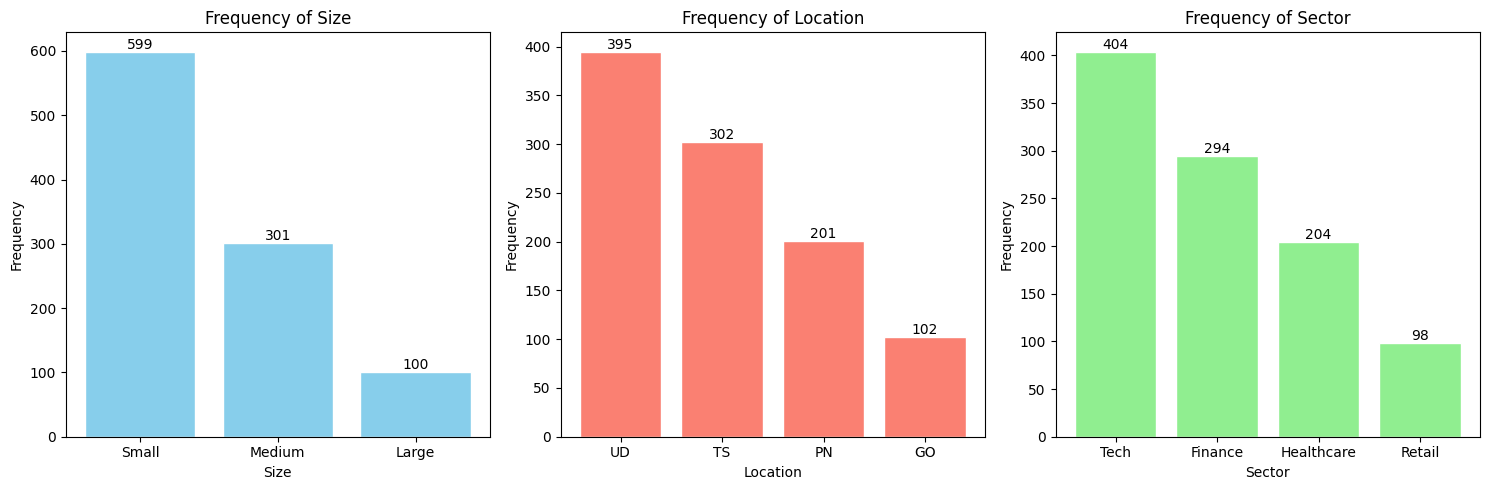

In [88]:
# Group the dataframe by sector, size, and location, and apply the sampling function
sample2 = df.groupby(['sector', 'size', 'location'], group_keys=False).apply(sample_percent, p=sample_percentage)

sample2.reset_index(drop=True, inplace=True)
print(f'Il campione estratto ha {len(sample2)} imprese')
plot_column_charts(sample2)


In [3]:
import pandas as pd

# Assuming df is your dataframe with columns: company_name, sector, size, location

# Define the function to sample 10% of companies within each group
def sample_10_percent(group):
    return group.sample(frac=0.1)

# Group the dataframe by sector, size, and location, and apply the sampling function
sampled_df = df.groupby(['sector', 'size', 'location'], group_keys=False).apply(sample_10_percent)

# Reset the index of the sampled dataframe
sampled_df.reset_index(drop=True, inplace=True)

# Display the sampled dataframe
print(sampled_df)


    company_name      sector   size   location
0    Company 111     Finance  Large    Gorizia
1    Company 649     Finance  Large    Gorizia
2      Company 5     Finance  Large  Pordenone
3    Company 911     Finance  Large    Trieste
4    Company 388     Finance  Large    Trieste
..           ...         ...    ...        ...
99   Company 584  Technology  Small    Gorizia
100  Company 656  Technology  Small  Pordenone
101  Company 261  Technology  Small    Trieste
102  Company 902  Technology  Small      Udine
103  Company 346  Technology  Small      Udine

[104 rows x 4 columns]


# check distribution in detail

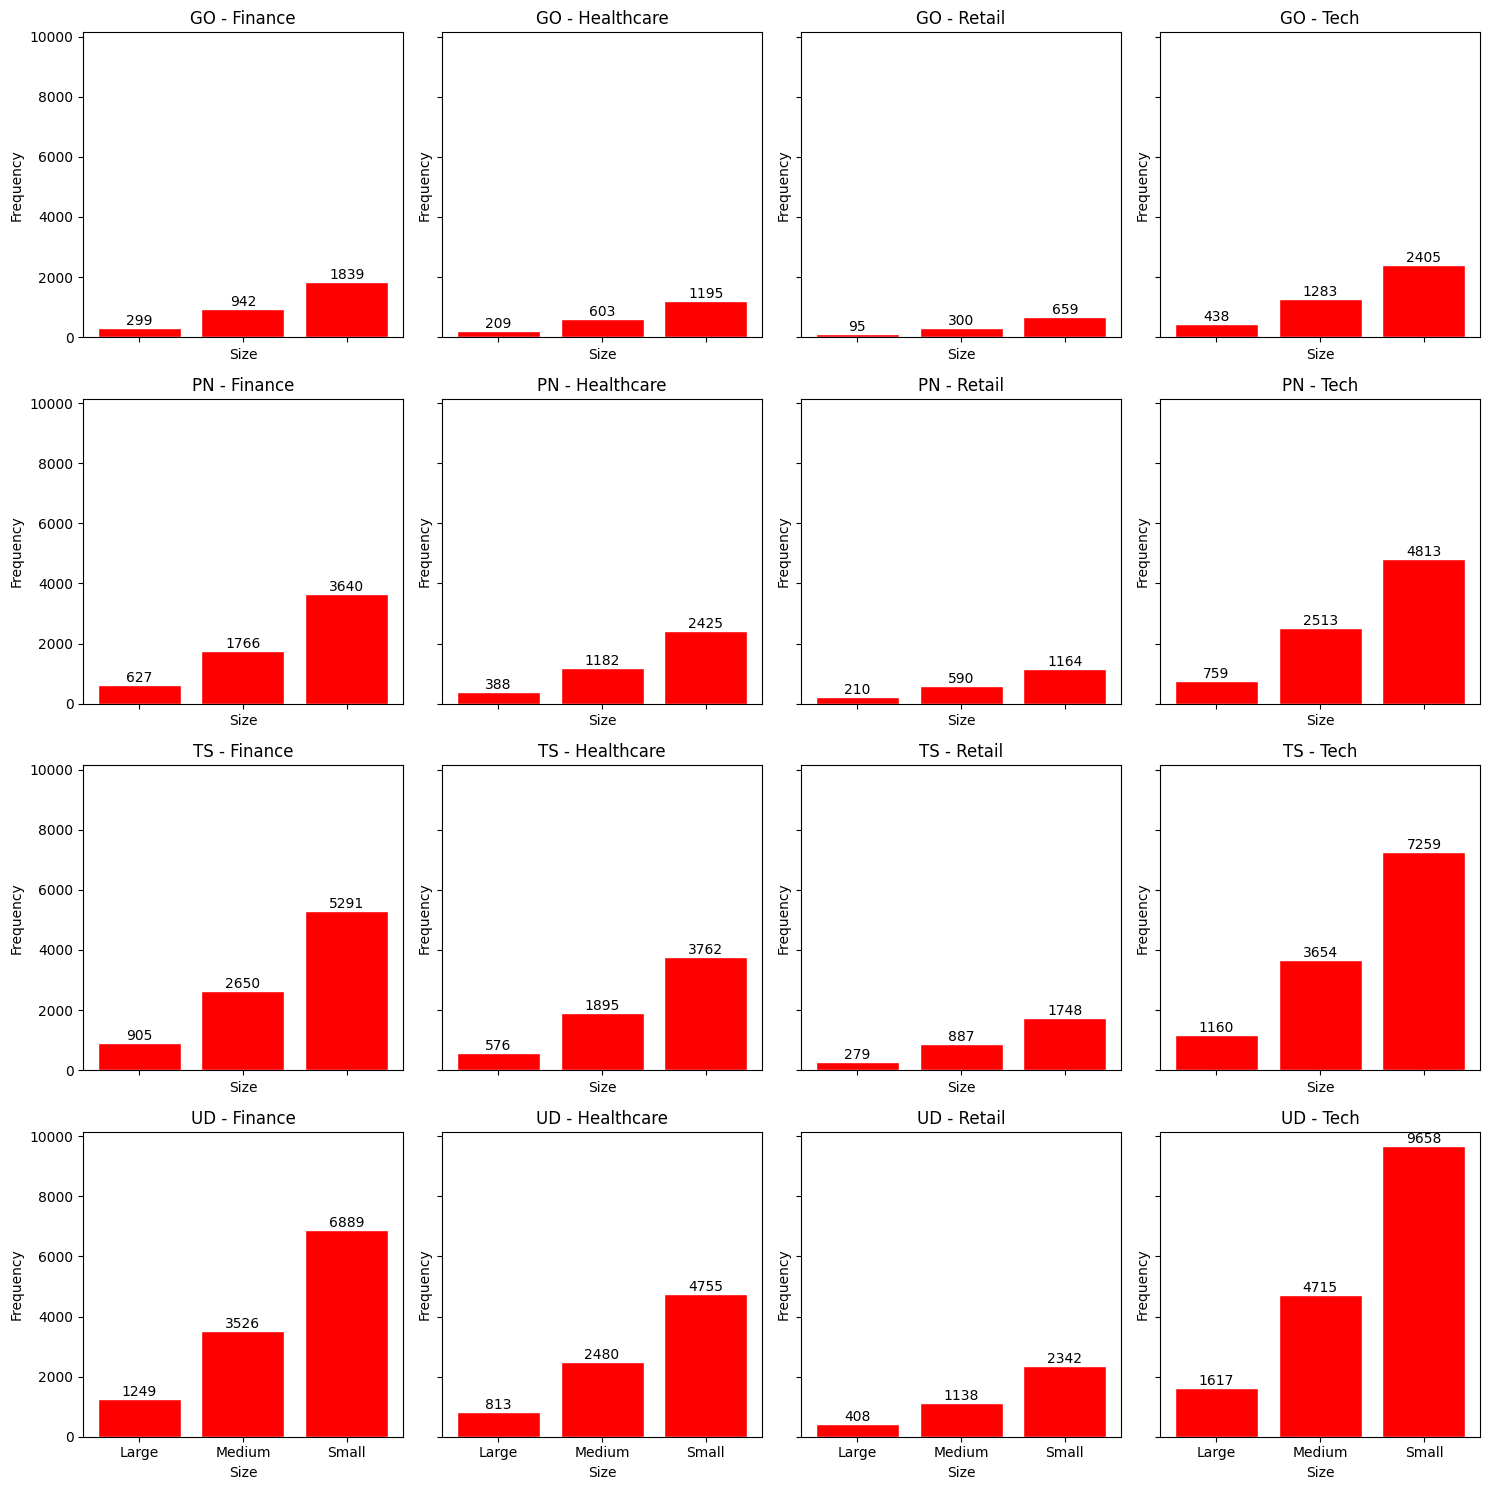

In [92]:
import matplotlib.pyplot as plt
import itertools

def plot_details_by_location_and_sector(df, bar_color) :
    # Calculate frequency of each combination of location, sector, and size
    counts = df.groupby(['location', 'sector', 'size']).size().unstack(fill_value=0)

    # Get unique categories for each variable
    locations = sorted(df['location'].unique())
    sectors = sorted(df['sector'].unique())
    sizes = sorted(df['size'].unique())

    # Generate all combinations of location, sector, and size
    combinations = list(itertools.product(locations, sectors, sizes))

    # Create subplots
    fig, axes = plt.subplots(len(locations), len(sectors), figsize=(15, 15), sharex=True, sharey=True)

    # Plot bars for each combination
    for i, loc in enumerate(locations):
        for j, sec in enumerate(sectors):
            bars = axes[i, j].bar(range(len(sizes)), counts.loc[(loc, sec)], color=bar_color, edgecolor='white')
            axes[i, j].set_title(f'{loc} - {sec}')
            axes[i, j].set_xlabel('Size')
            axes[i, j].set_ylabel('Frequency')
            axes[i, j].set_xticks(range(len(sizes)))
            axes[i, j].set_xticklabels(sizes)
            for k, bar in enumerate(bars):
                height = bar.get_height()
                axes[i, j].text(bar.get_x() + bar.get_width() / 2, height, counts.loc[(loc, sec), sizes[k]], ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function with your DataFrame
plot_details_by_location_and_sector(df, bar_color = 'red')


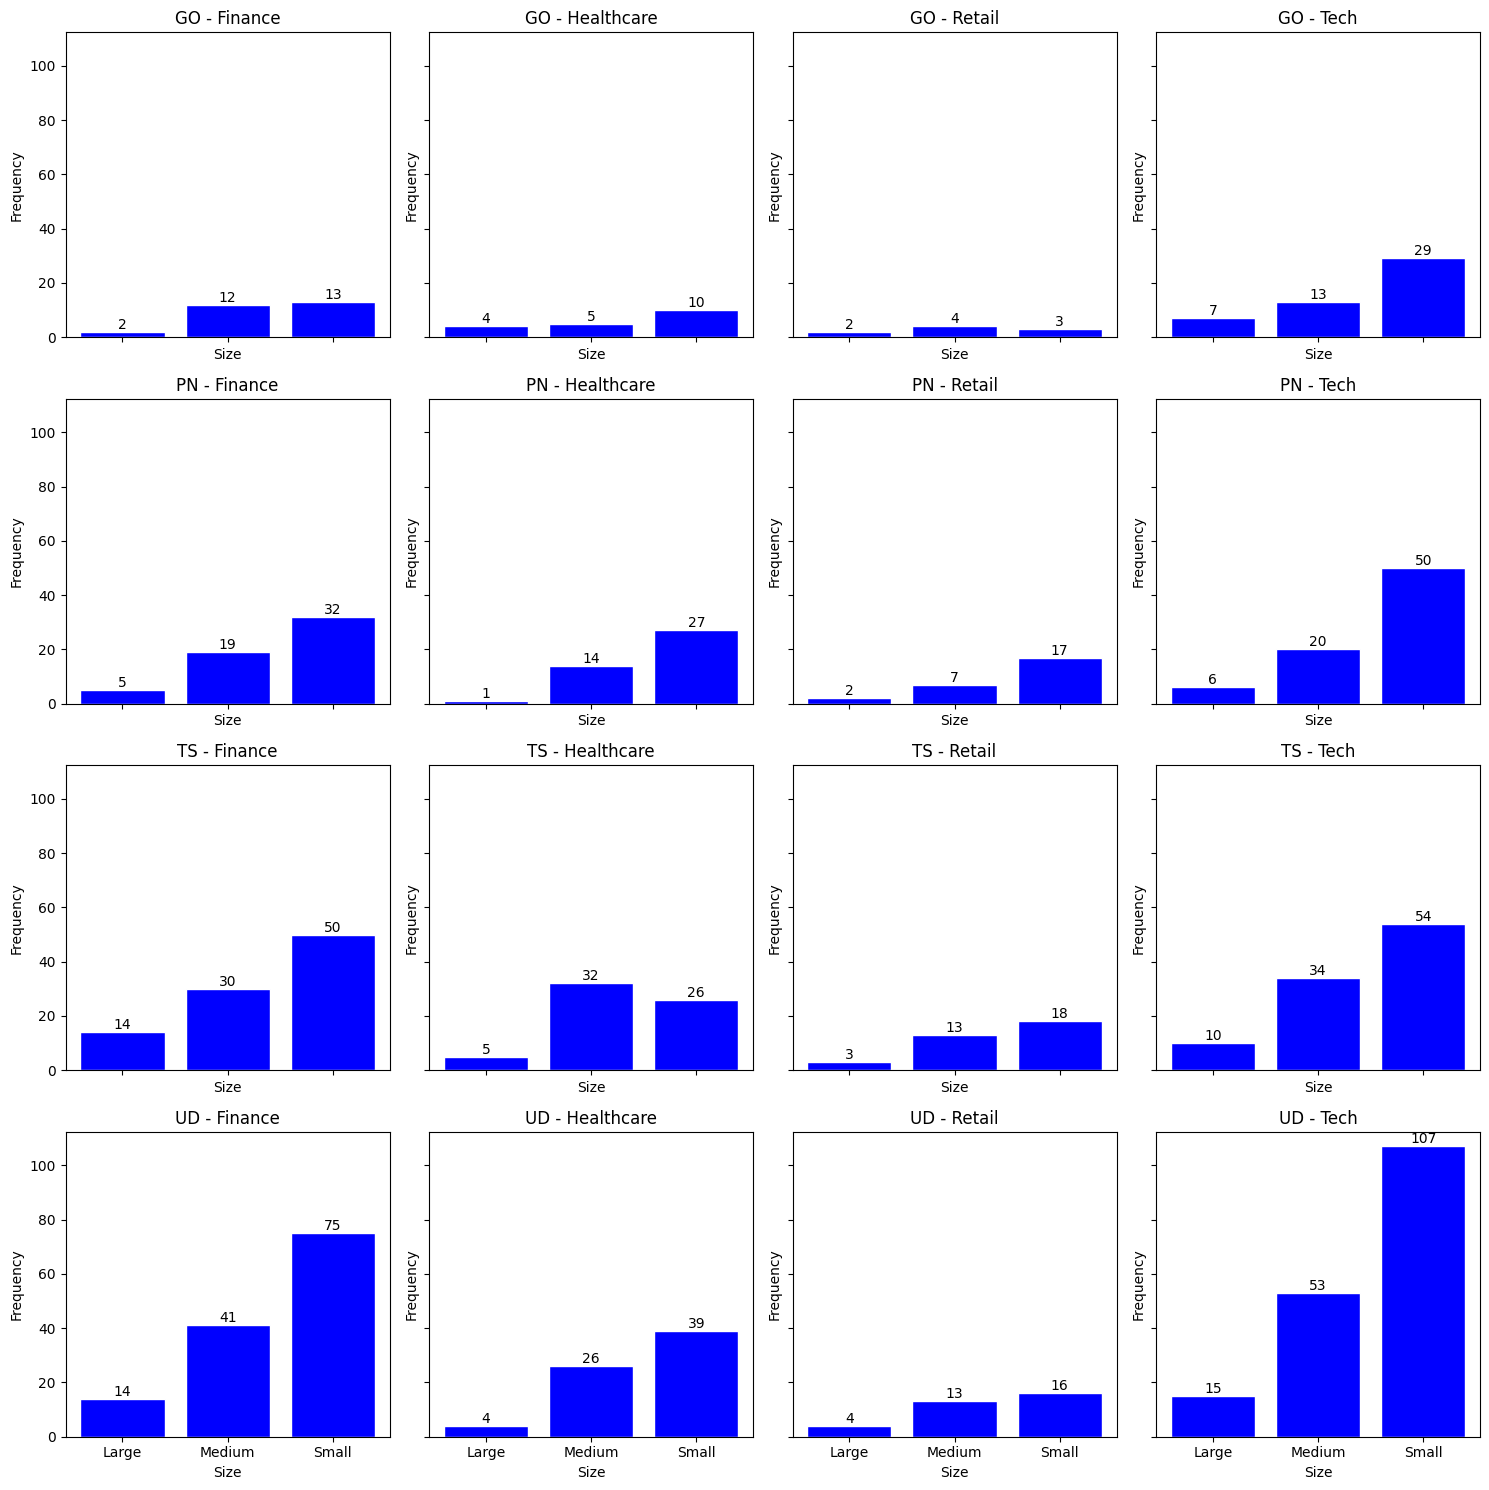

In [93]:
plot_details_by_location_and_sector(sample1, bar_color = 'blue')

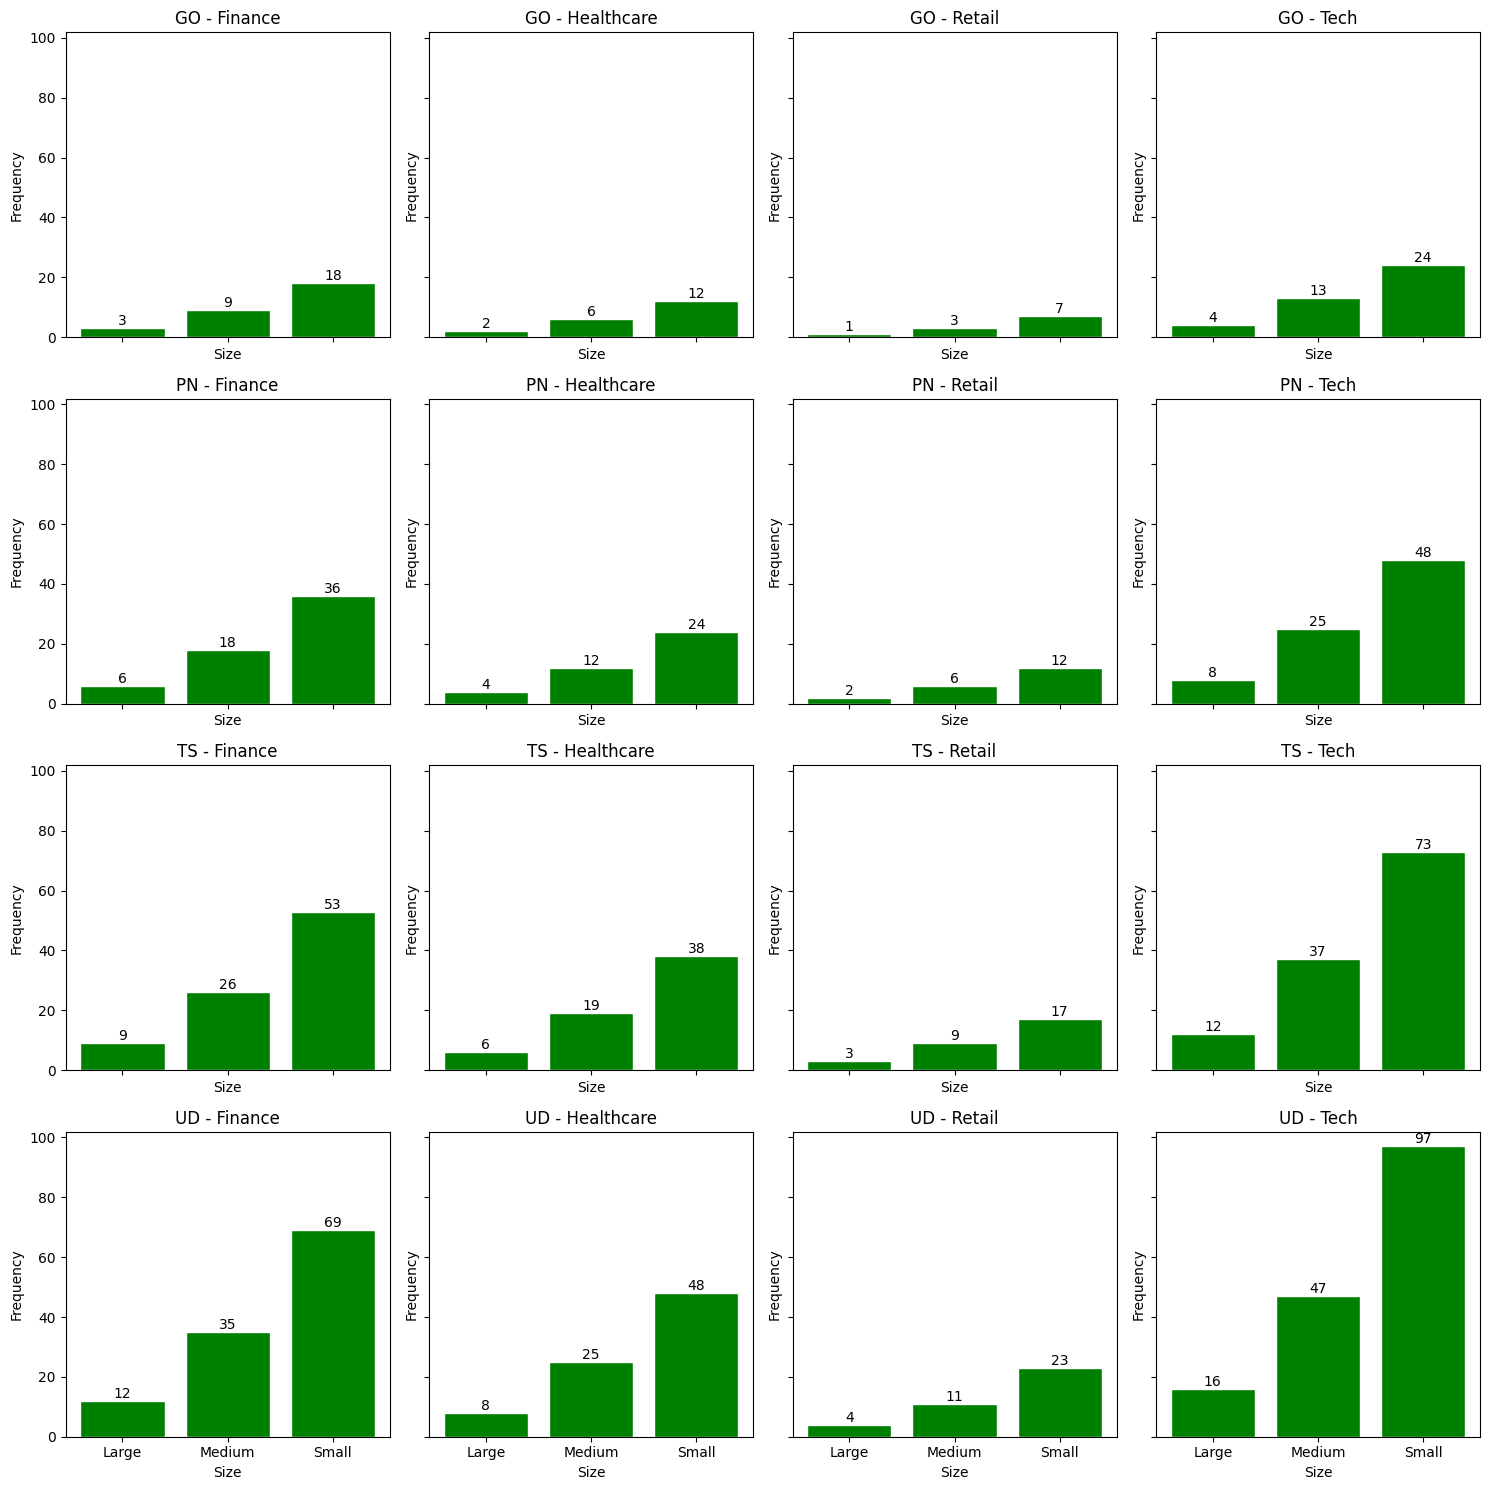

In [94]:
plot_details_by_location_and_sector(sample2, bar_color = 'green')